In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

4423680/4422102 [==============================] - 0s 0us/step


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


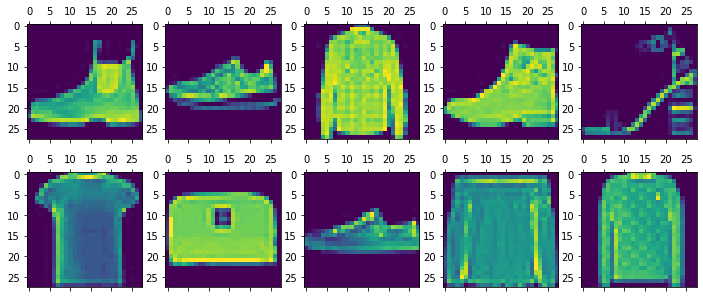

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#랜덤하게 몇 가지 데이터 가져오기
random_pick = np.random.randint(low=0, high=10000, size = 10)
random_pick

figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2,5,i))

tmp_list = []
for i in range(10):
    tmp = X_train[60000-random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)

print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

- 단계 2 : 신경망 구조 설계
    - 신경망의 입력층, 은닉층, 출력층의 노드 개수 설정
    - Sequential 모델을 생성하여 mlp 객체에 저장
    - 은닉층을 추가(input_shape은 입력층, units는 현재 쌓고 있는 은닉층으로 설정)
    - 출력층을 추가(input_shape는 생략 가능, units는 현재 쌓고 있는 출력층으로 설정)

In [6]:
n_input = 784
n_hidden=1024
n_output =10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

- 단계 3 : 신경망 학습
    - compile 함수로 학습을 준비함 (loss 매개변수는 손실함수, optimizers는 옵티마이저 설정)
    - fit 함수는 실제 학습을 수행 (batch_size는 미니배치 크기, epochs는 최대 학습 수, validation_data는 학습 도중에 사용할 검증 집합 설정)

- 단계 4 : 예측
    - evaluate 함수로 accuracy 측정

In [7]:
# 신경망 학습
mlp.compile(loss = 'mean_squared_error', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test), verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(X_test, y_test, verbose=0)
print('accuracy = ', res[1]*100)

Epoch 1/30
469/469 - 2s - loss: 0.1136 - accuracy: 0.3020 - val_loss: 0.0330 - val_accuracy: 0.8270
Epoch 2/30
469/469 - 2s - loss: 0.0302 - accuracy: 0.8457 - val_loss: 0.0300 - val_accuracy: 0.8359
Epoch 3/30
469/469 - 2s - loss: 0.0271 - accuracy: 0.8588 - val_loss: 0.0266 - val_accuracy: 0.8496
Epoch 4/30
469/469 - 2s - loss: 0.0252 - accuracy: 0.8680 - val_loss: 0.0252 - val_accuracy: 0.8565
Epoch 5/30
469/469 - 2s - loss: 0.0236 - accuracy: 0.8756 - val_loss: 0.0282 - val_accuracy: 0.8572
Epoch 6/30
469/469 - 2s - loss: 0.0226 - accuracy: 0.8809 - val_loss: 0.0234 - val_accuracy: 0.8677
Epoch 7/30
469/469 - 2s - loss: 0.0214 - accuracy: 0.8861 - val_loss: 0.0239 - val_accuracy: 0.8700
Epoch 8/30
469/469 - 2s - loss: 0.0208 - accuracy: 0.8900 - val_loss: 0.0222 - val_accuracy: 0.8724
Epoch 9/30
469/469 - 2s - loss: 0.0200 - accuracy: 0.8939 - val_loss: 0.0223 - val_accuracy: 0.8771
Epoch 10/30
469/469 - 2s - loss: 0.0196 - accuracy: 0.8976 - val_loss: 0.0220 - val_accuracy: 0.8762

## 학습 곡선 시각화
- hist 객체가 가진 정보를 이용하여 학습 곡선을 그림

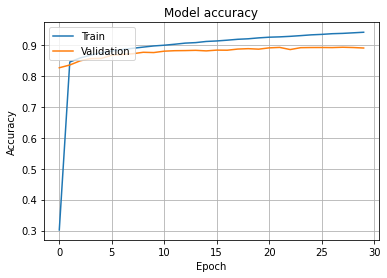

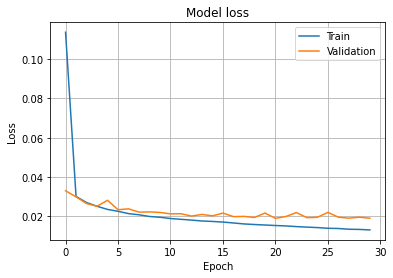

In [8]:
import matplotlib.pyplot as plt

# accuracy 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()

# 깊은 다층 퍼셉트론
- 다층 퍼셉트론에 은닉층을 더 많이 추가하면 깊은 다층 퍼셉트론
- 가장 쉽게 생각할 수 있는 딥러닝  모델

# 깊은 다층 퍼셉트론 프로그래밍
- 깊은 다층 퍼셉트론으로 MNIST 인식
- 단지 은닉층 1개가 4개로 확장된 차이

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 1s 0us/step

In [11]:
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))


In [14]:
# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test),verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(X_test, y_test, verbose=0)
print('accuracy = ',res[1]*100)

Epoch 1/30
469/469 - 6s - loss: 7.7867e-04 - accuracy: 0.9971 - val_loss: 0.0036 - val_accuracy: 0.9803
Epoch 2/30
469/469 - 5s - loss: 7.9859e-04 - accuracy: 0.9970 - val_loss: 0.0036 - val_accuracy: 0.9812
Epoch 3/30
469/469 - 5s - loss: 6.3754e-04 - accuracy: 0.9978 - val_loss: 0.0031 - val_accuracy: 0.9821
Epoch 4/30
469/469 - 5s - loss: 7.9728e-04 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 0.9821
Epoch 5/30
469/469 - 5s - loss: 8.2976e-04 - accuracy: 0.9970 - val_loss: 0.0031 - val_accuracy: 0.9834
Epoch 6/30
469/469 - 5s - loss: 7.1297e-04 - accuracy: 0.9974 - val_loss: 0.0035 - val_accuracy: 0.9798
Epoch 7/30
469/469 - 5s - loss: 5.8405e-04 - accuracy: 0.9980 - val_loss: 0.0033 - val_accuracy: 0.9820
Epoch 8/30
469/469 - 6s - loss: 6.4484e-04 - accuracy: 0.9978 - val_loss: 0.0035 - val_accuracy: 0.9828
Epoch 9/30
469/469 - 6s - loss: 7.5380e-04 - accuracy: 0.9972 - val_loss: 0.0038 - val_accuracy: 0.9791
Epoch 10/30
469/469 - 5s - loss: 0.0014 - accuracy: 0.9975 - val

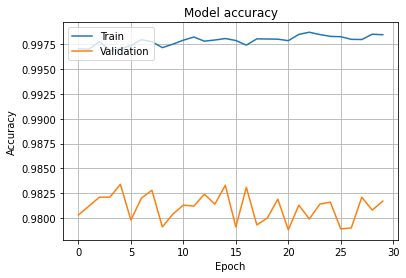

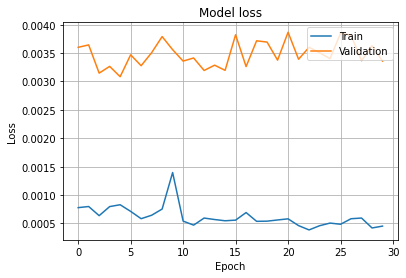

In [15]:
import matplotlib.pyplot as plt

# accuracy 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()

# 실험 결과
- 98.1
- 다층 퍼셉트론의 97.79%에 비해 0.31% 향상

# 가중치 초기화 방법
- kernel_initializer = 'random_uniform'으로 설정했으므로 균일 분포에서 난수 생성하여 가중치를 초기화 함
- Dense 함수의 API
    - kernel_initializer의 기본값음 'glorot_uniform'

    Dense(units, activation = None, kernel_initializer = __'glorot_uniform'__, bias_initializer = __'zeros'__)

    - glorot_uniform은 [Glorot2010]에서 유래하는데, 텐서플로는 좋은 성능이 입증되었다고 판단하여 기본값으로 제공함(보통 균일 분포보다 우수한 성능을 제공한다고 알려짐)

- 이런 사실에 따라 앞으로는 생략하여 glorot_uniform을 사용
    - 성능 향상 효과
    - 파이썬 코드가 간결해지는 효과


    mlp.add(Dense(units = n_hidden1, activation='tanh', input_shape=(n_input,))
    mlp.add(Dense(units = n_hidden2, activation='tanh')
    mlp.add(Dense(units = n_hidden3, activation='tanh')
    mlp.add(Dense(units = n_hidden4, activation='tanh')
    mlp.add(Dense(units = n_output, activation='tanh')

# 딥러닝의 학습 전략

- 층이 깊어지면 현실적인 문제 발생
    - 그레이디언트 소멸 문제
    - 과잉 적합 문제

# 그레이디언트 소멸 문제와 해결책
- 그레이디언트 소멸 문제
    - 미분의 연쇄 법칙 chain rule에 따르면,
    l번째 층의 그레이디언트는 오른쪽에 있는 l+1번째 층의 그레이디언트에 자신 층에서 발생한 그레이디언트를 곱하여 구함
    - 따라서 그레이디언트가 0.001처럼 작은 경우 왼쪽으로 진행하면서 점점 작아짐
    - 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우 느린 현상이 발생

- 해결책

    1) 병렬 처리
    - GPU 사용 또는 구글 colab에서 TPU(Tensor Processing Unit) 설정
        - 구글이 신경망 학습을 빠르게 할 목적으로 개발한 기계학습 전용 병렬 처리 기계

    2) ReLU 함수 사용
    - Tanh(s) 시그모이드 함수의 문제점

    s가 클 때 그레이디언트가 0에 가까워짐(s=8이면 그레이디언트 값은 0.0000004501)
    - ReLU는 s가 음수일 때 그레이디언트는 0, 양수일 때 1


## 과잉 적합과 과소 적합 회피 전략
- 모델로 1차 다하식을 사용하면 과소 적합(under fitting)
    - 데이터에 비해 모델이 작은 상황
- 용량이 가장 큰 12차 다항식은 훈련 집합에 대해 가장 적은 오류를 내지만 과잉 적합(over fitting)
    - 데이터의 복잡도에 비해 너무 큰 용량의 모델을 사용한 것

# 딥러닝의 과잉 적합 회피 전략

- 데이터 양을 늘림
    - 데이터 양을 늘릴 수 없는 상황에서는 훈련 샘플을 변형하여 인위적으로 늘리는 데이터 증대(data augmentation) 사용
- 규제 기법 적용
    - 데이터 증대, 가중치 감쇄, 드롭아웃, 앙상블 등